In [48]:
import opendatasets as od

od.download("https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing")
od.download("https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing")
od.download("https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing")

8542it [00:00, 9260208.00it/s]


Downloaded to  .\Customers.csv


4247it [00:00, ?it/s]


Downloaded to  .\Products.csv


54748it [00:00, 54119668.96it/s]

Downloaded to  .\Transactions.csv


In [49]:
import pandas as pd

In [50]:
# Loading the datasets
customers = pd.read_csv("F:/ZEOTAP_DataScience_Assignment/Customers.csv")
products = pd.read_csv("F:/ZEOTAP_DataScience_Assignment/Products.csv")
transactions = pd.read_csv("F:/ZEOTAP_DataScience_Assignment/Transactions.csv")

In [51]:
# Printing the first few rows of datasets to see if they are properly loaded
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [52]:
# Converting date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [53]:
# Checking if there are null/missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

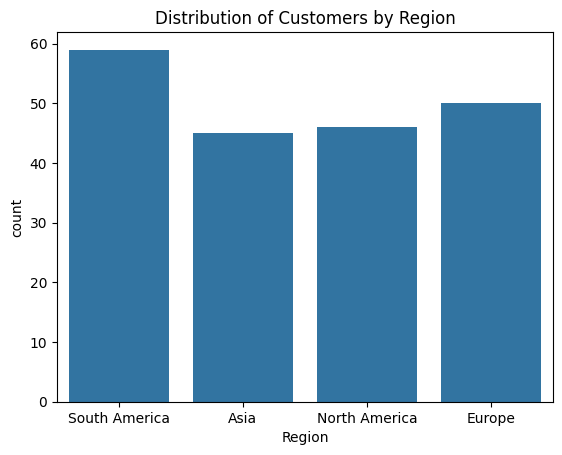

In [55]:
# Distribution of Customers by region
sns.countplot(x='Region', data=customers)
plt.title('Distribution of Customers by Region')
plt.show()

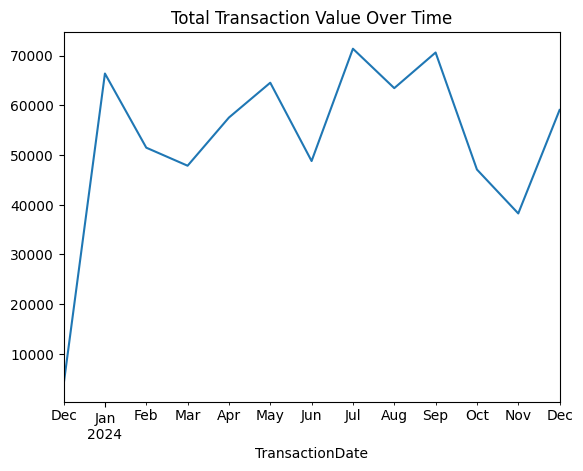

In [56]:
# Total transaction value over time
transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='line')
plt.title('Total Transaction Value Over Time')
plt.show()

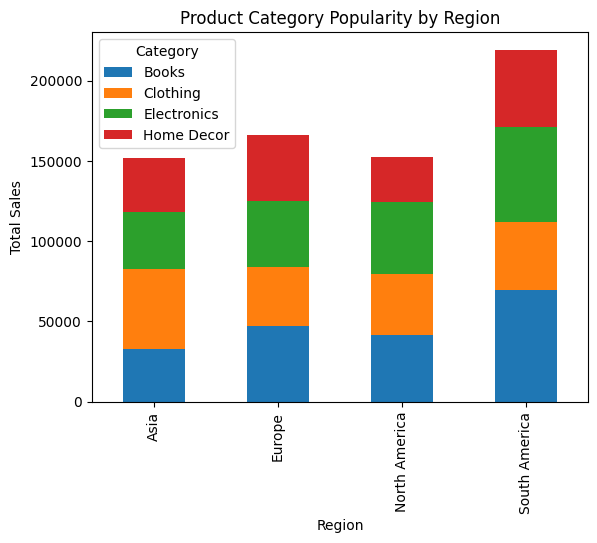

In [57]:
# Merge transactions with customers and products
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Analyze product popularity by region
category_region_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack().fillna(0)

# Visualize the data
category_region_sales.plot(kind='bar', stacked=True)
plt.title('Product Category Popularity by Region')
plt.ylabel('Total Sales')
plt.show()

In [58]:
# Calculate total spending by each customer
total_spending_by_customer = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Identify the top 10% customers
threshold = total_spending_by_customer['TotalValue'].quantile(0.9)
top_customers = total_spending_by_customer[total_spending_by_customer['TotalValue'] > threshold]

# Top 10% of customers contribute X% of the total revenue.
top_customer_spending_percentage = top_customers['TotalValue'].sum() / total_spending_by_customer['TotalValue'].sum() * 100
print(f"Top 10% of customers contribute {top_customer_spending_percentage:.2f}% of the total revenue.")


Top 10% of customers contribute 19.97% of the total revenue.


In [59]:
# Calculate number of purchases per customer
purchase_frequency = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()

# Percentage of one-time buyers vs. repeat customers
one_time_buyers = purchase_frequency[purchase_frequency['TransactionID'] == 1].shape[0] / purchase_frequency.shape[0] * 100
repeat_customers = 100 - one_time_buyers
print(f"{one_time_buyers:.2f}% of customers are one-time buyers, while {repeat_customers:.2f}% are repeat customers.")


6.03% of customers are one-time buyers, while 93.97% are repeat customers.


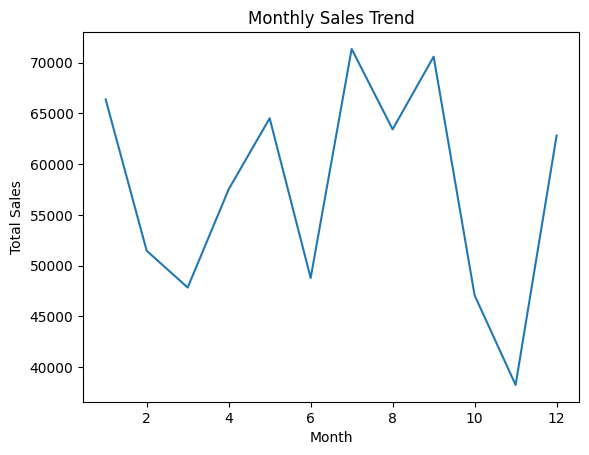

In [60]:
# Extract the month from the transaction date
transactions['Month'] = transactions['TransactionDate'].dt.month

# Group by month and calculate total transaction value
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Visualize sales trends by month
sns.lineplot(x='Month', y='TotalValue', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()